In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LassoLars, LogisticRegression, Ridge, Lasso, RidgeCV,ElasticNetCV,ElasticNetCV
from sklearn.naive_bayes import MultinomialNB, GaussianNB

import requests
import time
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

%matplotlib inline

In [3]:
df= pd.read_csv('./Hotel_Reviews.csv')

In [78]:
df.shape

(99979, 2213)

In [79]:
515738-515611

127

# Dropping reviews that has no positive and no negative reviews 

In [5]:
ind_remove = df[ (df['Positive_Review']=='No Positive') & (df['Negative_Review']=='No Negative') ].index

In [6]:
df.drop(index=ind_remove,inplace=True)

In [7]:
df.shape

(515611, 17)

In [8]:
df = df.loc[:100_000,:]    # choosing the number of data points to use in the analysis 

In [9]:
df.shape

(99979, 17)

In [10]:
df = df.reset_index() 

In [11]:
df.shape

(99979, 18)

In [12]:
df.drop(['index'], inplace=True, axis=1)

In [13]:
df.shape

(99979, 17)

In [14]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [15]:
df.isnull().sum()

Hotel_Address                                  0
Additional_Number_of_Scoring                   0
Review_Date                                    0
Average_Score                                  0
Hotel_Name                                     0
Reviewer_Nationality                           0
Negative_Review                                0
Review_Total_Negative_Word_Counts              0
Total_Number_of_Reviews                        0
Positive_Review                                0
Review_Total_Positive_Word_Counts              0
Total_Number_of_Reviews_Reviewer_Has_Given     0
Reviewer_Score                                 0
Tags                                           0
days_since_review                              0
lat                                           37
lng                                           37
dtype: int64

In [16]:
df.columns.values

array(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
       'Tags', 'days_since_review', 'lat', 'lng'], dtype=object)

In [17]:
df.dtypes

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object

In [18]:
# sns.lmplot(x='Average_Score', y='Reviewer_Score', data=df)

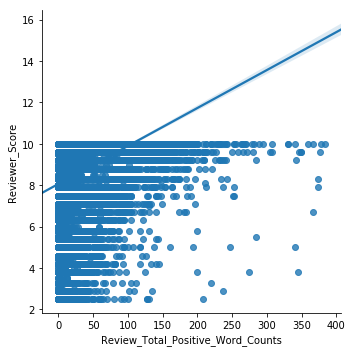

In [19]:
sns.lmplot(x='Review_Total_Positive_Word_Counts', y='Reviewer_Score', data=df)

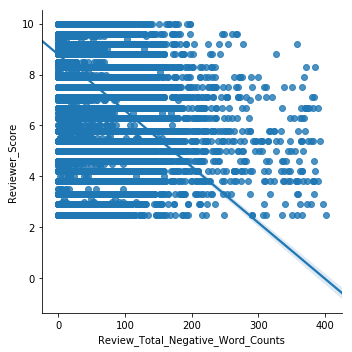

In [20]:
sns.lmplot(x='Review_Total_Negative_Word_Counts', y='Reviewer_Score', data=df)

# Dummying the reviewer nationality column

In [21]:
df = pd.get_dummies(df,
                          columns=['Reviewer_Nationality'],
                          drop_first=False)

In [22]:
df.shape

(99979, 213)

In [23]:
df.isnull().sum()

Hotel_Address                       0
Additional_Number_of_Scoring        0
Review_Date                         0
Average_Score                       0
Hotel_Name                          0
                                   ..
Reviewer_Nationality_ Venezuela     0
Reviewer_Nationality_ Vietnam       0
Reviewer_Nationality_ Yemen         0
Reviewer_Nationality_ Zambia        0
Reviewer_Nationality_ Zimbabwe      0
Length: 213, dtype: int64

In [24]:
len(df.columns)

213

In [25]:
corr = df.corr()

In [26]:
pd.set_option('display.max_columns', 9999)

In [27]:
corr.head(10)

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng,Reviewer_Nationality_,Reviewer_Nationality_ Abkhazia Georgia,Reviewer_Nationality_ Afghanistan,Reviewer_Nationality_ Albania,Reviewer_Nationality_ Algeria,Reviewer_Nationality_ Andorra,Reviewer_Nationality_ Angola,Reviewer_Nationality_ Antarctica,Reviewer_Nationality_ Antigua Barbuda,Reviewer_Nationality_ Argentina,Reviewer_Nationality_ Armenia,Reviewer_Nationality_ Aruba,Reviewer_Nationality_ Australia,Reviewer_Nationality_ Austria,Reviewer_Nationality_ Azerbaijan,Reviewer_Nationality_ Bahamas,Reviewer_Nationality_ Bahrain,Reviewer_Nationality_ Bangladesh,Reviewer_Nationality_ Barbados,Reviewer_Nationality_ Belarus,Reviewer_Nationality_ Belgium,Reviewer_Nationality_ Belize,Reviewer_Nationality_ Benin,Reviewer_Nationality_ Bermuda,Reviewer_Nationality_ Bhutan,Reviewer_Nationality_ Bosnia and Herzegovina,Reviewer_Nationality_ Botswana,Reviewer_Nationality_ Brazil,Reviewer_Nationality_ British Virgin Islands,Reviewer_Nationality_ Brunei,Reviewer_Nationality_ Bulgaria,Reviewer_Nationality_ Burundi,Reviewer_Nationality_ Cambodia,Reviewer_Nationality_ Cameroon,Reviewer_Nationality_ Canada,Reviewer_Nationality_ Cayman Islands,Reviewer_Nationality_ Central Africa Republic,Reviewer_Nationality_ Chile,Reviewer_Nationality_ China,Reviewer_Nationality_ Colombia,Reviewer_Nationality_ Comoros,Reviewer_Nationality_ Costa Rica,Reviewer_Nationality_ Crimea,Reviewer_Nationality_ Croatia,Reviewer_Nationality_ Cura ao,Reviewer_Nationality_ Cyprus,Reviewer_Nationality_ Czech Republic,Reviewer_Nationality_ Democratic Republic of the Congo,Reviewer_Nationality_ Denmark,Reviewer_Nationality_ Dominican Republic,Reviewer_Nationality_ East Timor,Reviewer_Nationality_ Ecuador,Reviewer_Nationality_ Egypt,Reviewer_Nationality_ El Salvador,Reviewer_Nationality_ Equatorial Guinea,Reviewer_Nationality_ Estonia,Reviewer_Nationality_ Ethiopia,Reviewer_Nationality_ Falkland Islands Malvinas,Reviewer_Nationality_ Faroe Islands,Reviewer_Nationality_ Fiji,Reviewer_Nationality_ Finland,Reviewer_Nationality_ France,Reviewer_Nationality_ French Guiana,Reviewer_Nationality_ Gabon,Reviewer_Nationality_ Gambia,Reviewer_Nationality_ Georgia,Reviewer_Nationality_ Germany,Reviewer_Nationality_ Ghana,Reviewer_Nationality_ Gibraltar,Reviewer_Nationality_ Greece,Reviewer_Nationality_ Guadeloupe,Reviewer_Nationality_ Guam,Reviewer_Nationality_ Guatemala,Reviewer_Nationality_ Guernsey,Reviewer_Nationality_ Guyana,Reviewer_Nationality_ Haiti,Reviewer_Nationality_ Honduras,Reviewer_Nationality_ Hong Kong,Reviewer_Nationality_ Hungary,Reviewer_Nationality_ Iceland,Reviewer_Nationality_ India,Reviewer_Nationality_ Indonesia,Reviewer_Nationality_ Iran,Reviewer_Nationality_ Iraq,Reviewer_Nationality_ Ireland,Reviewer_Nationality_ Isle of Man,Reviewer_Nationality_ Israel,Reviewer_Nationality_ Italy,Reviewer_Nationality_ Ivory Coast,Reviewer_Nationality_ Jamaica,Reviewer_Nationality_ Japan,Reviewer_Nationality_ Jersey,Reviewer_Nationality_ Jordan,Reviewer_Nationality_ Kazakhstan,Reviewer_Nationality_ Kenya,Reviewer_Nationality_ Kosovo,Reviewer_Nationality_ Kuwait,Reviewer_Nationality_ Kyrgyzstan,Reviewer_Nationality_ Laos,Reviewer_Nationality_ Latvia,Reviewer_Nationality_ Lebanon,Reviewer_Nationality_ Liberia,Reviewer_Nationality_ Libya,Reviewer_Nationality_ Liechtenstein,Reviewer_Nationality_ Lithuania,Reviewer_Nationality_ Luxembourg,Reviewer_Nationality_ Macau,Reviewer_Nationality_ Macedonia,Reviewer_Nationality_ Madagascar,Reviewer_Nationality_ Malawi,Reviewer_Nationality_ Malaysia,Reviewer_Nationality_ Maldives,Reviewer_Nationality_ Mali,Reviewer_Nationality_ Malta,Reviewer_Nationality_ Martinique,Reviewer_Nationality_ Mauritania,Reviewer_Nationality_ Mauritius,Reviewer_Nationality_ Mexico,Reviewer_Nationality_ Moldova,Reviewer_Nationality_ Monaco,Reviewer_Nationality_ Mongolia,Revi

# Scikit-Learn TfidfVectorizer

In [28]:
from sklearn.feature_extraction import stop_words

In [29]:
# Instantiate a CountVectorizer with (stop words, max features, N-grams)
tvec_neg = TfidfVectorizer(max_features=1000,stop_words=None,ngram_range=(1,2))
tvec_pos = TfidfVectorizer(max_features=1000,stop_words=None,ngram_range=(1,2))

In [30]:
# Fit the vectorizer on our corpus
tvec_neg.fit(df['Negative_Review'])
tvec_pos.fit(df['Positive_Review'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [31]:
# Transform the corpus.
neg_reviews = tvec_neg.transform(df['Negative_Review'])
pos_reviews = tvec_pos.transform(df['Positive_Review'])

In [32]:
type(neg_reviews)

scipy.sparse.csr.csr_matrix

In [33]:
# Convert the negative comments vectors (columns) into a DataFrame.

neg_reviews_df  = pd.DataFrame(neg_reviews.toarray(),
                          columns=tvec_neg.get_feature_names())
neg_reviews_df

00   10   12   15   20   30   50      able   able to     about  \
0      0.045826  0.0  0.0  0.0  0.0  0.0  0.0  0.043002  0.043161  0.000000   
1      0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
2      0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
3      0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.052584   
4      0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
...         ...  ...  ...  ...  ...  ...  ...       ...       ...       ...   
99974  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
99975  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
99976  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
99977  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
99978  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   

       about the  above  absolutely   ac  access  actually     after  \
0            0.0    0.0         0.0  0.0     0.0       0.0  0.033435   
1            0.0    0.0         0.0  0.0     0.0       0.0  0.000000   
2            0.0    0.0         0.0  0.0     0.0       0.0  0.000000   
3            0.0    0.0         0.0  0.0     0.0       0.0  0.052845   
4            0.0    0.0         0.0  0.0     0.0       0.0  0.077218   
...          ...    ...         ...  ...     ...       ...       ...   
99974        0.0    0.0         0.0  0.0     0.0       0.0  0.000000   
99975        0.0    0.0         0.0  0.0     0.0       0.0  0.000000   
99976        0.0    0.0         0.0  0.0     0.0       0.0  0.000000   
99977        0.0    0.0         0.0  0.0     0.0       0.0  0.000000   
99978        0.0    0.0         0.0  0.0     0.0       0.0  0.000000   

          again  air  air con  air conditioning  alarm       all  all night  \
0      0.036489  0.0      0.0               0.0    0.0  0.027782        0.0   
1      0.000000  0.0      0.0               0.0    0.0  0.000000        0.0   
2      0.000000  0.0      0.0               0.0    0.0  0.000000        0.0   
3      0.000000  0.0      0.0               0.0    0.0  0.043910        0.0   
4      0.168547  0.0      0.0               0.0    0.0  0.000000        0.0   
...         ...  ...      ...               ...    ...       ...        ...   
99974  0.000000  0.0      0.0               0.0    0.0  0.000000        0.0   
99975  0.000000  0.0      0.0               0.0    0.0  0.000000        0.0   
99976  0.000000  0.0      0.0               0.0    0.0  0.000000        0.0   
99977  0.000000  0.0      0.0               0.0    0.0  0.000000        0.0   
99978  0.000000  0.0      0.0               0.0    0.0  0.000000        0.0   

       all the  almost   already      also  also the  although  always  \
0          0.0     0.0  0.000000  0.000000       0.0       0.0     0.0   
1          0.0     0.0  0.000000  0.000000       0.0       0.0     0.0   
2          0.0     0.0  0.000000  0.000000       0.0       0.0     0.0   
3          0.0     0.0  0.072991  0.100332       0.0       0.0     0.0   
4          0.0     0.0  0.000000  0.000000       0.0       0.0     0.0   
...        ...     ...       ...       ...       ...       ...     ...   
99974      0.0     0.0  0.000000  0.000000       0.0       0.0     0.0   
99975      0.0     0.0  0.000000  0.000000       0.0       0.0     0.0   
99976      0.0     0.0  0.000000  0.000000       0.0       0.0     0.0   
99977      0.0     0.0  0.000000  0.000000       0.0       0.0     0.0   
99978      0.0     0.0  0.000000  0.000000       0.0       0.0     0.0   

             am  amount        an  an hour       and  and coffee  and had  \
0      0.080473     0.0  0.029993      0.0  0.131908         0.0      0.0   
1      0.000000     0.0  0.000000      0.0  0.000000         0.0      0.0   
2      0.000000     0.0  0.000000      0.0  0.130275         0.0      0.0   
3      0.000000     0.0  0.094811      0.0  0.130303 

In [34]:
# Convert the positive comments vectors (columns) into a DataFrame.

pos_reviews_df  = pd.DataFrame(pos_reviews.toarray(),
                          columns=tvec_neg.get_feature_names())
pos_reviews_df

00   10   12   15   20   30   50  able  able to  about  about the  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0      0.0    0.0        0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0      0.0    0.0        0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0      0.0    0.0        0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0      0.0    0.0        0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0      0.0    0.0        0.0   
...    ...  ...  ...  ...  ...  ...  ...   ...      ...    ...        ...   
99974  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0      0.0    0.0        0.0   
99975  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0      0.0    0.0        0.0   
99976  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0      0.0    0.0        0.0   
99977  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0      0.0    0.0        0.0   
99978  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0      0.0    0.0        0.0   

       above  absolutely   ac  access  actually  after  again  air  air con  \
0        0.0         0.0  0.0     0.0       0.0    0.0    0.0  0.0      0.0   
1        0.0         0.0  0.0     0.0       0.0    0.0    0.0  0.0      0.0   
2        0.0         0.0  0.0     0.0       0.0    0.0    0.0  0.0      0.0   
3        0.0         0.0  0.0     0.0       0.0    0.0    0.0  0.0      0.0   
4        0.0         0.0  0.0     0.0       0.0    0.0    0.0  0.0      0.0   
...      ...         ...  ...     ...       ...    ...    ...  ...      ...   
99974    0.0         0.0  0.0     0.0       0.0    0.0    0.0  0.0      0.0   
99975    0.0         0.0  0.0     0.0       0.0    0.0    0.0  0.0      0.0   
99976    0.0         0.0  0.0     0.0       0.0    0.0    0.0  0.0      0.0   
99977    0.0         0.0  0.0     0.0       0.0    0.0    0.0  0.0      0.0   
99978    0.0         0.0  0.0     0.0       0.0    0.0    0.0  0.0      0.0   

       air conditioning  alarm  all  all night  all the  almost   already  \
0              0.000000    0.0  0.0   0.000000      0.0     0.0  0.000000   
1              0.000000    0.0  0.0   0.000000      0.0     0.0  0.140783   
2              0.000000    0.0  0.0   0.000000      0.0     0.0  0.000000   
3              0.205266    0.0  0.0   0.000000      0.0     0.0  0.000000   
4              0.000000    0.0  0.0   0.487556      0.0     0.0  0.000000   
...                 ...    ...  ...        ...      ...     ...       ...   
99974          0.000000    0.0  0.0   0.000000      0.0     0.0  0.000000   
99975          0.000000    0.0  0.0   0.000000      0.0     0.0  0.000000   
99976          0.000000    0.0  0.0   0.000000      0.0     0.0  0.000000   
99977          0.000000    0.0  0.0   0.000000      0.0     0.0  0.000000   
99978          0.000000    0.0  0.0   0.000000      0.0     0.0  0.000000   

       also  also the  although  always   am  amount   an  an hour  and  \
0       0.0       0.0  0.000000     0.0  0.0     0.0  0.0      0.0  0.0   
1       0.0       0.0  0.194673     0.0  0.0     0.0  0.0      0.0  0.0   
2       0.0       0.0  0.082548     0.0  0.0     0.0  0.0      0.0  0.0   
3       0.0       0.0  0.155903     0.0  0.0     0.0  0.0      0.0  0.0   
4       0.0       0.0  0.198779     0.0  0.0     0.0  0.0      0.0  0.0   
...     ...       ...       ...     ...  ...     ...  ...      ...  ...   
99974   0.0       0.0  0.140575     0.0  0.0     0.0  0.0      0.0  0.0   
99975   0.0       0.0  0.000000     0.0  0.0     0.0  0.0      0.0  0.0   
99976   0.0       0.0  0.000000     0.0  0.0     0.0  0.0      0.0  0.0   
99977   0.0       0.0  0.000000     0.0  0.0     0.0  0.0      0.0  0.0   
99978   0.0       0.0  0.000000     0.0  0.0     0.0  0.0      0.0  0.0   

       and coffee  and had  and in    and it  and no  and not  and the  \
0             0.0      0.0     0.0  0.000000     0.0      0.0      0.0   
1             0.0      0.0     0.0  0.148269     0.0      0.0      0.0   
2             0.0      0.0     0.0  0.000000     0.0      0.0      0.0   
3           

In [35]:
pos_reviews_df.shape,neg_reviews_df.shape

((99979, 1000), (99979, 1000))

(array([22878., 13976., 11231.,  8660.,  7752., 13086.,  8563.,  5527.,
         6132.,  2174.]),
 array([0.        , 0.21400662, 0.42801323, 0.64201985, 0.85602647,
        1.07003308, 1.2840397 , 1.49804631, 1.71205293, 1.92605955,
        2.14006616]),
 <a list of 10 Patch objects>)

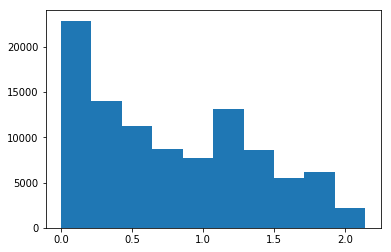

In [36]:
plt.hist(df['Reviewer_Score'].map(lambda x : np.log(11-x)))

Text(0, 0.5, 'Number of Reviews')

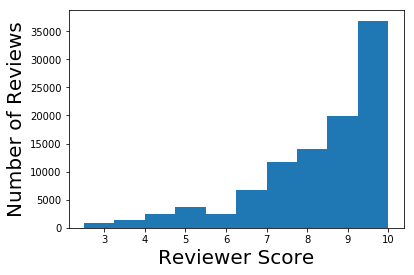

In [81]:
plt.hist(df['Reviewer_Score'])
plt.xlabel('Reviewer Score', fontsize=20)
plt.ylabel('Number of Reviews', fontsize=20)

In [83]:
515000*0.000002

1.03

In [84]:
30/515000

5.825242718446602e-05

In [38]:
rev_score = df.Reviewer_Score.unique()

In [39]:
df['Reviewer_Score'].sort_values().unique()

array([ 2.5,  2.9,  3. ,  3.1,  3.3,  3.5,  3.8,  4. ,  4.2,  4.4,  4.5,
        4.6,  5. ,  5.4,  5.5,  5.6,  5.8,  6. ,  6.3,  6.5,  6.7,  6.9,
        7. ,  7.1,  7.5,  7.9,  8. ,  8.1,  8.3,  8.5,  8.8,  9. ,  9.2,
        9.4,  9.5,  9.6, 10. ])

# Merging pos and neg reviews with the main Dataframe



In [40]:
df.isnull().sum()

Hotel_Address                       0
Additional_Number_of_Scoring        0
Review_Date                         0
Average_Score                       0
Hotel_Name                          0
                                   ..
Reviewer_Nationality_ Venezuela     0
Reviewer_Nationality_ Vietnam       0
Reviewer_Nationality_ Yemen         0
Reviewer_Nationality_ Zambia        0
Reviewer_Nationality_ Zimbabwe      0
Length: 213, dtype: int64

In [41]:
df= pd.concat([df, neg_reviews_df, pos_reviews_df ], axis=1)

In [42]:
df.shape

(99979, 2213)

In [43]:
neg_reviews_df.shape,pos_reviews_df.shape

((99979, 1000), (99979, 1000))

In [44]:
df.head()

Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194    8/3/2017            7.7  Hotel Arena   
1                           194    8/3/2017            7.7  Hotel Arena   
2                           194   7/31/2017            7.7  Hotel Arena   
3                           194   7/31/2017            7.7  Hotel Arena   
4                           194   7/24/2017            7.7  Hotel Arena   

                                     Negative_Review  \
0   I am so angry that i made this post available...   
1                                        No Negative   
2   Rooms are nice but for elderly a bit difficul...   
3   My room was dirty and I was afraid to walk ba...   
4   You When I booked with your company on line y...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   
3                                210                     1403   
4                                140                     1403   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   
4    Amazing location and building Romantic setting    

   Review_Total_Positive_Word_Counts  \
0                                 11   
1                                105   
2                                 21   
3                                 26   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           7             2.9   
1                                           7             7.5   
2                                           9             7.1   
3                                           1             3.8   
4                                           3             6.7   

                                                Tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
1  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
2  [' Leisure trip ', ' Family with young childre...            3 days   
3  [' Leisure trip ', ' Solo traveler ', ' Duplex...            3 days   
4  [' Leisure trip ', ' Couple ', ' Suite ', ' St...           10 days   

         lat       lng  Reviewer_Nationality_   \
0  52.360576  4.915968                       0   
1  52.360576  4.915968                       0   
2  52.360576  4.915968                       0   
3  52.360576  4.915968                       0   
4  52.360576  4.915968                       0   

   Reviewer_Nationality_ Abkhazia Georgia   \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Reviewer_Nationality_ Afghanistan   Reviewer_Nationality_ Albania   \
0                                   0                               0   
1                                   0                               0   
2                                   0                               0   
3                                   0                               0   
4                                   0                               0   

   Reviewer_Nationality_ Algeria   Reviewer_Nationality_ Andorra   \
0                      

In [45]:
df.shape

(99979, 2213)

In [46]:
df.columns[:20]

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Negative_Review',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Positive_Review', 'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng', 'Reviewer_Nationality_ ',
       'Reviewer_Nationality_ Abkhazia Georgia ',
       'Reviewer_Nationality_ Afghanistan ', 'Reviewer_Nationality_ Albania '],
      dtype='object')

# Creating X and y

In [47]:
drop_list = ['Hotel_Address', 
            'Review_Date',
            'Hotel_Name',
            'days_since_review',
            'lat',
            'lng',
             'Tags',
            'Reviewer_Score',
            'Negative_Review',
            'Positive_Review',
             'Additional_Number_of_Scoring',
             'Total_Number_of_Reviews_Reviewer_Has_Given'

            ]
X = df.drop( drop_list, axis=1)
y = df['Reviewer_Score']

In [48]:
X.columns

Index(['Average_Score', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts',
       'Reviewer_Nationality_ ', 'Reviewer_Nationality_ Abkhazia Georgia ',
       'Reviewer_Nationality_ Afghanistan ', 'Reviewer_Nationality_ Albania ',
       'Reviewer_Nationality_ Algeria ', 'Reviewer_Nationality_ Andorra ',
       ...
       'would have', 'would not', 'wouldn', 'wrong', 'you', 'you are',
       'you can', 'you could', 'you have', 'your'],
      dtype='object', length=2201)

# Spliting the train and test datasets

In [49]:
# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                             y,
                                                             test_size=0.25,
                                                             random_state=42)

In [50]:
X_train.shape

(74984, 2201)

In [51]:
X_test.shape

(24995, 2201)

In [52]:
y_train.shape

(74984,)

In [53]:
y_test.shape

(24995,)

# Scaling the data

In [54]:
# Instantiate Standard Scaler
ss = StandardScaler()

In [55]:
X_train.shape

(74984, 2201)

In [56]:
type(X_train)

pandas.core.frame.DataFrame

In [57]:
X_train.dtypes[:20]

Average_Score                              float64
Review_Total_Negative_Word_Counts            int64
Total_Number_of_Reviews                      int64
Review_Total_Positive_Word_Counts            int64
Reviewer_Nationality_                        uint8
Reviewer_Nationality_ Abkhazia Georgia       uint8
Reviewer_Nationality_ Afghanistan            uint8
Reviewer_Nationality_ Albania                uint8
Reviewer_Nationality_ Algeria                uint8
Reviewer_Nationality_ Andorra                uint8
Reviewer_Nationality_ Angola                 uint8
Reviewer_Nationality_ Antarctica             uint8
Reviewer_Nationality_ Antigua Barbuda        uint8
Reviewer_Nationality_ Argentina              uint8
Reviewer_Nationality_ Armenia                uint8
Reviewer_Nationality_ Aruba                  uint8
Reviewer_Nationality_ Australia              uint8
Reviewer_Nationality_ Austria                uint8
Reviewer_Nationality_ Azerbaijan             uint8
Reviewer_Nationality_ Bahamas  

In [58]:
X_train_scaled = ss.fit_transform(X_train)

In [59]:
X_test_scaled = ss.transform(X_test)

# Performing log-reg on 5 classes (Regularized by default)

The y variable here must be a category so we round our y variable (reviews) so it is integers which we can use in the modeling.

In [60]:
def mapper(x):
    if x <= 2:return 1
    if x <= 4:return 3
    if x <= 6:return 5
    if x <= 8:return 7 
    return 9

In [61]:
y_train = y_train.map(lambda x: mapper (x))
y_test = y_test.map(lambda x: mapper (x))

In [62]:
# y_train_5class[:5]

In [63]:
# y_train[:5]

In [64]:
# Instantiate logistic regression model without regularization.
logreg = LogisticRegression()

In [65]:
# Fit logreg model.
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
# Generate predictions for test data from logistic regression model.
y_preds_test = logreg.predict(X_test)

In [67]:
# Calculating Accuracy using the train data
y_preds_train = logreg.predict(X_train)
logreg1 = logreg.score(X_train, y_train)
# Let's estimate our accuracy on the "new" test data
logreg2 = logreg.score(X_test, y_test)
print(f'Logistic Regression Accuracy Score on train/test data: {round(logreg1, 3),round(logreg2, 3)}')

Logistic Regression Accuracy Score on train/test data: (0.734, 0.727)


# Multinomial Naive Bayes

We fit multinomial Naive Bayes because count vectorizer gives us an integer count of words 
in a document.

In [68]:
mnb = MultinomialNB()

mnb.fit(X_train, y_train)
mnb1=mnb.score(X_train, y_train)
mnb2=mnb.score(X_test, y_test)
print(f'Accuracy Score on train/test data: {round(mnb1, 3),round(mnb2, 3)}')

Accuracy Score on train/test data: (0.625, 0.621)


# Gaussian Naive Bayes

In [69]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)
gnb1=gnb.score(X_train, y_train)
gnb2=gnb.score(X_test, y_test)
print(f'Accuracy Score on train/test data: {round(gnb1, 3),round(gnb2, 3)}')

Accuracy Score on train/test data: (0.534, 0.533)


# Predicted vs. actual reviews 

Text(0.5, 0, 'Actual Score')

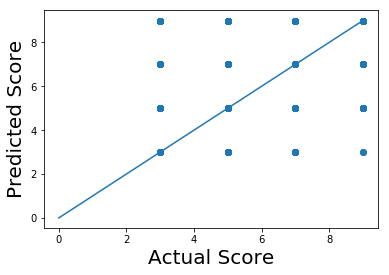

In [70]:
plt.scatter(y_test,y_preds_test)
plt.plot(range(10))
plt.ylabel('Predicted Score', fontsize=20)
plt.xlabel('Actual Score', fontsize=20)

In [71]:
abs(y_test - y_preds_test).sort_values()

28745    0
58286    0
20870    0
44491    0
67190    0
        ..
74680    6
62978    6
42848    6
36952    6
90593    6
Name: Reviewer_Score, Length: 24995, dtype: int64

In [72]:
# df['Negative_Review'][73900],df['Negative_Review'][72007]

In [73]:
# df['Positive_Review'][73900],df['Positive_Review'][72007]

In [74]:
# df['Reviewer_Score'][73900]

In [75]:
# y_test[73900]

# Predicted reviews vs. Residuals

In [76]:
# resid = y_preds_train - y_train

In [77]:
# plt.scatter(y_train, resid)
# plt.ylabel('Residuals', fontsize=20)
# plt.xlabel('Actual Score', fontsize=20)